In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV


In [6]:
import pickle
X = pd.read_pickle('Data/Life/X.pickle')
y = pd.read_pickle('Data/Life/y.pickle')

In [9]:
from sklearn.model_selection import train_test_split
                              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

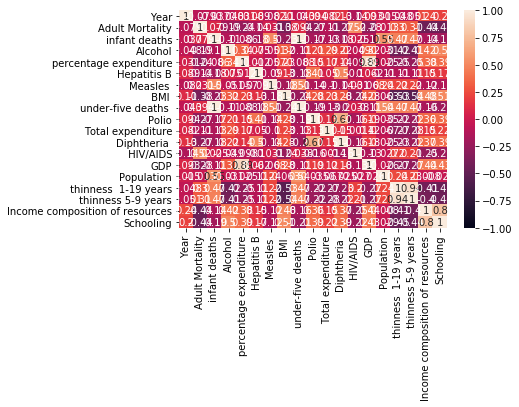

In [10]:
sns.heatmap(X.corr(),vmin=-1,vmax=1,annot = True)

# 1.1) Linear Model

In [13]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [14]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train,has_constant='add')
X_test = sm.add_constant(X_test,has_constant='add')
model=sm.OLS(y_train,X_train)
model=model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     502.2
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        20:04:44   Log-Likelihood:                -6221.1
No. Observations:                2203   AIC:                         1.248e+04
Df Residuals:                    2183   BIC:                         1.260e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1349      0.087    792.576      0.0

In [15]:
while model.pvalues.max()>0.05:
    X_train=np.delete(X_train,model.pvalues.argmax(),axis=1)
    X_test=np.delete(X_test,model.pvalues.argmax(),axis=1)
    model=sm.OLS(y_train,X_train)
    model=model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     636.4
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        20:04:47   Log-Likelihood:                -6222.5
No. Observations:                2203   AIC:                         1.248e+04
Df Residuals:                    2187   BIC:                         1.257e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1349      0.087    792.821      0.0

In [16]:
#test the model
y_pred= model.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2_Adj = 1 - (1-R2)*((len(X_test) - 1)/(len(X_test) - len(X_test[0])))
print(R2,R2_Adj)

0.8252004115001785 0.8213051560461435


In [17]:
from sklearn.metrics import mean_absolute_error
M_abs_E=mean_absolute_error(y_test,y_pred)
print(M_abs_E)


3.0117054060558885


In [18]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
RMSE=MSE**0.5
print(RMSE)

4.047490951837697


In [19]:
predict_model=pd.DataFrame(y_test)
predict_model.columns = ['Real']
predict_model['Predict']=y_pred
print(predict_model)

      Real    Predict
867   77.3  77.135043
1780  66.6  65.989075
621   52.6  53.392577
2715  61.5  66.887118
2717  60.0  59.652656
...    ...        ...
2800  78.5  77.764377
2852  69.9  64.059829
2323  82.0  73.555801
1775  54.0  49.858139
2859  73.9  73.823096

[735 rows x 2 columns]


# 1.2)Linear regression PART 2

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

#1) Hyper parameter
param_dict = {
                'normalize':[True,False], 
                'fit_intercept':[True,False], 
          }
search = GridSearchCV(LinearRegression(),param_dict,cv=4)
search.fit(X_train,y_train)
print(search.best_params_,search.best_score_)


{'fit_intercept': True, 'normalize': True} 0.8114306474495501


In [118]:
#2) make the model
model = LinearRegression(fit_intercept= False, normalize= True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-50.30681548070601

In [119]:
#4) report  
y_pred= model.predict(X_test)

score_train=model.score(X_train,y_train)
score_test=model.score(X_test,y_test)
print(score_train,score_test)

-52.76221524187179 -50.30681548070601


In [120]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2_Adj = 1 - (1-R2)*((len(X_test) - 1)/(len(X_test) - len(X_test[0])))
print(R2,R2_Adj)

-50.30681548070601 -51.45014284517857


In [121]:
from sklearn.metrics import mean_absolute_error
M_ABS_E=mean_absolute_error(y_test,y_pred)
print(M_ABS_E)

69.22492730216952


In [122]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
RMSE=MSE**0.5
print(RMSE)

69.34309368151915


In [123]:

predict_model=pd.DataFrame(y_test)
predict_model.columns = ['Real']
predict_model['Predict']=y_pred
predict_model.head(10)


,Real,Predict
867,77.3,8.000125
1780,66.6,-3.145843
621,52.6,-15.742341
2715,61.5,-2.247800
2717,60.0,-9.482262
2855,69.3,-8.096486
1410,71.1,2.633398
933,81.5,10.812368
2572,74.3,1.688313
1376,51.9,-22.266492


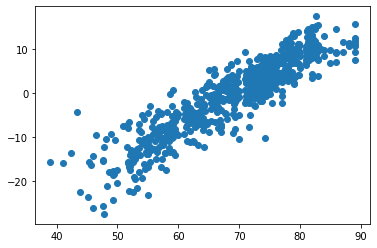

In [124]:
plt.scatter(y_test, y_pred)

# 2) KNN


In [125]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [126]:
from sklearn.neighbors import KNeighborsRegressor


#1) Hyper parameter
param_dict = {
                'n_neighbors':range(2,21), 
                'weights':['uniform','distance'], 
                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p':[1,2]
           }
search = GridSearchCV(KNeighborsRegressor(),param_dict,cv=4)
search.fit(X_train,y_train)
print(search.best_params_,search.best_score_)









{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 0.9364027325853972


In [127]:
print(search.best_params_,search.best_score_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 0.9364027325853972


In [142]:
#2) make the model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'distance')
model.fit(X_train, y_train)




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='distance')

Text(0.5, 1.0, 'Finding optimal n_estimators')

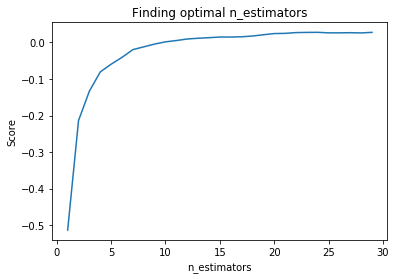

In [143]:
#3) validate
scores=[]
for i in range(1,30):
    model = KNeighborsRegressor(algorithm= 'auto', n_neighbors= i, p= 1, weights= 'distance')
    scores.append(cross_val_score(model,X,y,cv=4).mean())
    
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.title("Finding optimal n_estimators")   


In [144]:
model = KNeighborsRegressor(algorithm= 'auto', n_neighbors= 3, p= 1, weights= 'distance')
scores.append(cross_val_score(model,X,y,cv=4).mean())
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='distance')

In [145]:
#4) report  
y_pred= model.predict(X_test)
score_train=model.score(X_train,y_train)
score_test=model.score(X_test,y_test)
print(score_train,score_test)



1.0 0.9440988816739969


In [146]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2_Adj = 1 - (1-R2)*((len(X_test) - 1)/(len(X_test) - len(X_test[0])))
print(R2,R2_Adj)


0.9440988816739969 0.9428531743018297


In [147]:
from sklearn.metrics import mean_absolute_error
MabsE=mean_absolute_error(y_test,y_pred)
print(MabsE)

1.4318795979614398


In [148]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
RMSE=MSE**0.5
print(RMSE)

2.2888953228749864


In [149]:
predict_model=pd.DataFrame(y_test)
predict_model.columns = ['Real']
predict_model['Predict']=y_pred
predict_model.head(10)


,Real,Predict
867,77.3,76.673649
1780,66.6,65.568381
621,52.6,52.889805
2715,61.5,58.980268
2717,60.0,64.409761
2855,69.3,69.228299
1410,71.1,71.901858
933,81.5,82.415280
2572,74.3,73.873226
1376,51.9,54.422026


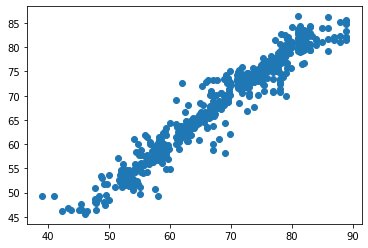

In [150]:
plt.scatter(y_test, y_pred)

# 3)adaboost
    
    

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  AdaBoostRegressor

#1) Hyper parameter
param_dict = {
                 'criterion':['mse', 'friedman_mse', 'mae'],
                 'splitter':['best', 'random'],
                 'max_depth':[2,3,4,5,6,7,None], 
                 'random_state':[0], 
                 'min_impurity_decrease':[0,0.05, 0.1]
             }

search = GridSearchCV(DecisionTreeRegressor(),param_dict,cv=4)
search.fit(X_train,y_train)
search.best_params_
search.best_score_

base_model=DecisionTreeRegressor(criterion= 'mse', max_depth= 6, min_impurity_decrease= 0,
random_state= 0, splitter= 'best')

from sklearn.model_selection import  GridSearchCV
param_dict = {
                 'n_estimators':[10,100,200,500], 
                 'loss':['linear', 'square', 'exponential'],
                 'random_state':[0]
             }

search = GridSearchCV(AdaBoostRegressor(),param_dict,cv=4)
search.fit(X_train,y_train)



GridSearchCV(cv=4, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 100, 200, 500],
                         'random_state': [0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [151]:
print(search.best_params_,search.best_score_)

{'loss': 'linear', 'n_estimators': 100, 'random_state': 0} 0.8995014628514397


In [152]:
#2) make the model
model= AdaBoostRegressor(base_model,loss= 'linear', n_estimators= 10, random_state= 0)
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9345468182086668

In [154]:
#3) validate
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1,20):
    clf = AdaBoostRegressor(base_model,loss= 'linear', n_estimators= i, random_state= 0)
    scores.append(cross_val_score(clf,X,y,cv=4).mean())


Text(0.5, 1.0, 'Finding optimal n_estimators')

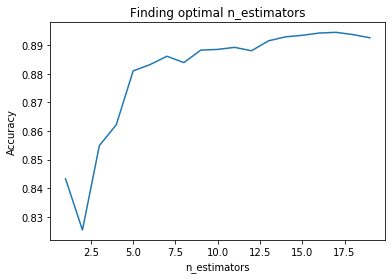

In [155]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),scores)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Finding optimal n_estimators")

In [156]:
#4) report  
y_pred= model.predict(X_test)

score_train=model.score(X_train,y_train)
score_test=model.score(X_test,y_test)
print(score_train,score_test)


0.9608310885179032 0.9345468182086668


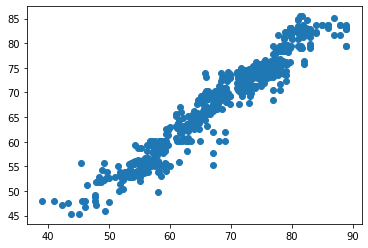

In [160]:
plt.scatter(y_test, y_pred)

In [157]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2_Adj = 1 - (1-R2)*((len(X_test) - 1)/(len(X_test) - len(X_test[0])))
print(R2,R2_Adj)

0.9345468182086668 0.9330882514835117


In [158]:
from sklearn.metrics import mean_absolute_error
MabsE=mean_absolute_error(y_test,y_pred)
print(MabsE)


1.8009456015196443


In [159]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
RMSE=MSE**0.5
print(RMSE)

2.476743689938407


# 4)random forest
 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  RandomForestRegressor

#1) Hyper parameter
param_dict = {
                 'n_estimators':[5,10,20,30],
                 'criterion':['mse', 'mae'],
                 'max_depth':[2,3,4,5,6,7,None], 
                 'random_state':[0], 
             }

search = GridSearchCV(RandomForestRegressor(),param_dict,cv=4)
search.fit(X_train,y_train)


In [ ]:
print(search.best_params_,search.best_score_)

In [ ]:
#2) make the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30,random_state=0,max_depth=None)
model.fit(X_train,y_train)
model.score(X_test,y_test)


In [ ]:
#3) validate
from sklearn.model_selection import cross_val_score
scores = []
for i in range(10,50,5):
    clf = RandomForestRegressor(n_estimators=i,random_state=0,max_depth=None)
    scores.append(cross_val_score(clf,X,y,cv=4).mean())



In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(10,50,5),scores)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Finding optimal n_estimators")

In [ ]:
#4) report  
y_pred= model.predict(X_test)

score_train=model.score(X_train,y_train)
score_test=model.score(X_test,y_test)
print(score_train,score_test)


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2_Adj = 1 - (1-R2)*((len(X_test) - 1)/(len(X_test) - len(X_test.iloc[0])))
print(R2,R2_Adj)


In [ ]:
from sklearn.metrics import mean_absolute_error
MSE=mean_absolute_error(y_test,y_pred)
print(MSE)


In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
RMSE=MSE**0.5
print(RMSE)

# 5)SVR 


In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.svm import SVR

param_dict = {
                'kernel': ['linear', 'poly', 'rbf'],
                'gamma' : ['scale', 'auto'],
                'C': [4,5,6,8,10,14,16]                
            }

model = GridSearchCV(SVR(),param_dict,cv=4)
model.fit(X_train,y_train)








In [ ]:
print(model.best_params_,model.best_score_)

In [ ]:
#2) make the model

model = SVR(C= 16, gamma='auto',kernel='rbf')
model.fit(X_train,y_train)
model.score(X_test,y_test)


In [ ]:
#3) validate
from sklearn.model_selection import cross_val_score
scores = []
for i in range(5,30):
    model = SVR(C= i, gamma='auto',kernel='rbf')
    scores.append(cross_val_score(model,X,y,cv=4).mean())
    



In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(5,30),scores)
plt.xlabel("n_estimators")
plt.ylabel("C")
plt.title("Finding optimal C")

In [ ]:
#4) report  
y_pred= model.predict(X_test)

score_train=model.score(X_train,y_train)
score_test=model.score(X_test,y_test)
print(score_train,score_test)



In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2_Adj = 1 - (1-R2)*((len(X_test) - 1)/(len(X_test) - len(X_test[0])))
print(R2,R2_Adj)

In [ ]:
from sklearn.metrics import mean_absolute_error
MabsE=mean_absolute_error(y_test,y_pred)
print(MabsE)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
RMSE=MSE**0.5
print(RMSE)

# Deep Learning ,FC

In [162]:
# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [240]:
L1_IN = X_train.shape[1]
L1_OUT=7
print('Layer 1 :  '+str(L1_IN)+' ----->  '+ str(L1_OUT))
L2_IN=7
L2_OUT=1
print('Layer 2 :  '+str(L2_IN)+' ----->  '+ str(L2_OUT))

Layer 1 :  17 ----->  7
Layer 2 :  7 ----->  1


In [241]:
import tensorflow as tf
model = tf.keras.models.Sequential();
model.add(tf.keras.layers.Dense(L1_OUT, input_shape=(L1_IN,)))
model.add(tf.keras.layers.Dense(L2_OUT, input_shape=(L2_IN,)))


In [242]:
sgd=tf.keras.optimizers.SGD(0.001, 0.9) 
model.compile(optimizer=sgd,loss='mse',metrics=['mae', 'mse'])
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule) 

In [243]:

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[scheduler])


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Train on 2203 samples, validate on 735 samples
Epoch 1/100
2203/2203 [==============================] - 0s 179us/sample - loss: 817.1721 - mae: 19.3419 - mse: 817.1718 - val_loss: 137.4759 - val_mae: 5.8415 - val_mse: 137.4760
Epoch 2/100
2203/2203 [==============================] - 0s 58us/sample - loss: 29.9599 - mae: 3.9236 - mse: 29.9599 - val_loss: 19.8718 - val_mae: 3.3528 - val_mse: 19.8718
Epoch 3/100
2203/2203 [==============================] - 0s 67us/sample - loss: 31.8672 - mae: 4.0517 - mse: 31.8672 - val_loss: 26.8726 - val_mae: 3.8299 - val_mse: 26.8726
Epoch 4/100
2203/2203 [==============================] - 0s 49us/sample - loss: 22.6020 - mae: 3.5579 - mse: 22.6020 - val_loss: 18.4724 - val_mae: 3.1331 - val_mse: 18.4724
Epoch 5/100
2203/2203 [==============================] - 0s 46us/sample - loss: 22.4643 - mae: 3.5499 - mse: 22.4643 - val_loss: 25.5003 - val_mae: 4.0692 - val_mse: 25.5003
Epoch 6/100
2203/2203 [==============================] - 0s 49us/sample - los

2203/2203 [==============================] - 0s 47us/sample - loss: 19.9510 - mae: 3.3516 - mse: 19.9510 - val_loss: 21.8186 - val_mae: 3.4695 - val_mse: 21.8186
Epoch 48/100
2203/2203 [==============================] - 0s 47us/sample - loss: 22.7261 - mae: 3.4761 - mse: 22.7261 - val_loss: 22.2459 - val_mae: 3.5598 - val_mse: 22.2459
Epoch 49/100
2203/2203 [==============================] - 0s 47us/sample - loss: 19.8379 - mae: 3.3829 - mse: 19.8379 - val_loss: 21.9661 - val_mae: 3.5446 - val_mse: 21.9661
Epoch 50/100
2203/2203 [==============================] - 0s 47us/sample - loss: 20.3608 - mae: 3.3724 - mse: 20.3608 - val_loss: 21.5644 - val_mae: 3.4543 - val_mse: 21.5644
Epoch 51/100
2203/2203 [==============================] - 0s 49us/sample - loss: 19.9344 - mae: 3.3409 - mse: 19.9344 - val_loss: 17.0191 - val_mae: 3.0952 - val_mse: 17.0191
Epoch 52/100
2203/2203 [==============================] - 0s 59us/sample - loss: 17.3859 - mae: 3.1036 - mse: 17.3859 - val_loss: 17.0398 

Epoch 94/100
2203/2203 [==============================] - 0s 45us/sample - loss: 16.9225 - mae: 3.0561 - mse: 16.9225 - val_loss: 16.3006 - val_mae: 3.0323 - val_mse: 16.3006
Epoch 95/100
2203/2203 [==============================] - 0s 44us/sample - loss: 16.9086 - mae: 3.0584 - mse: 16.9086 - val_loss: 16.7541 - val_mae: 3.0493 - val_mse: 16.7541
Epoch 96/100
2203/2203 [==============================] - 0s 45us/sample - loss: 16.8561 - mae: 3.0621 - mse: 16.8561 - val_loss: 17.0963 - val_mae: 3.0910 - val_mse: 17.0963
Epoch 97/100
2203/2203 [==============================] - 0s 47us/sample - loss: 16.8458 - mae: 3.0568 - mse: 16.8458 - val_loss: 16.4209 - val_mae: 3.0195 - val_mse: 16.4209
Epoch 98/100
2203/2203 [==============================] - 0s 57us/sample - loss: 16.9053 - mae: 3.0574 - mse: 16.9053 - val_loss: 16.7959 - val_mae: 3.0541 - val_mse: 16.7959
Epoch 99/100
2203/2203 [==============================] - 0s 53us/sample - loss: 16.9615 - mae: 3.0632 - mse: 16.9615 - val_l

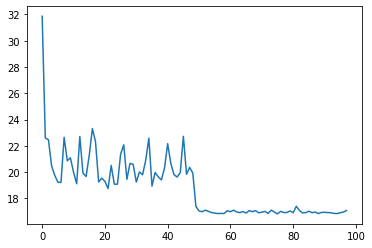

In [244]:
# Plot the loss
plt.plot(r.history['loss'][2:], label='loss')

In [245]:
y_pred = model.predict(X_test).flatten()


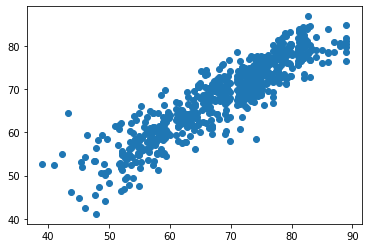

In [246]:
plt.scatter(y_test, y_pred)


In [247]:
w, b = model.layers[0].get_weights()
print (len(w), len(b))

17 7


In [248]:
model.save('Dence.h5')

# Test the Released Model

In [249]:
model = tf.keras.models.load_model('Dence.h5')
print(model.layers)
model.evaluate(X_test, y_test)

[<tensorflow.python.keras.layers.core.Dense object at 0x0000016AC4061108>, <tensorflow.python.keras.layers.core.Dense object at 0x0000016AC405A2C8>]
735/735 [==============================] - 0s 100us/sample - loss: 16.2173 - mae: 2.9927 - mse: 16.2173


[16.217302794683548, 2.9927182, 16.217302]

In [250]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred, multioutput='variance_weighted')
R2

0.8269597055425324